Source: https://github.com/PJY-609/MNIST-KNN/blob/master/KNN%2BMNIST.ipynb

In [182]:
from sklearn import datasets

In [231]:
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



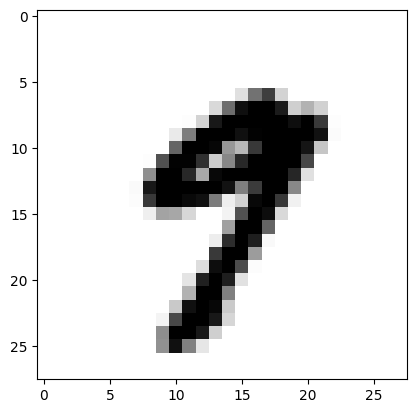

In [233]:
# plt.imshow(x_train[6], cmap='gray_r')
plt.imshow(x_test[20].reshape((28, 28)), cmap='gray_r')

In [167]:
# load the MNIST digits dataset
mnist = datasets.load_digits()
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [168]:
# import tensorflow as tf

# # Load the Fashion MNIST dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# # Print the shape of the training data
# print("Shape of x_train:", x_train.shape)
# print()

Shape of x_train: (60000, 28, 28)



In [185]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [170]:
from sklearn.model_selection import train_test_split
import numpy as np
# Training and testing split,
# 75% for training and 25% for testing
# (trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25)

# take 10% of the training data and use that for validation
# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1)

In [234]:
from sklearn.neighbors import KNeighborsClassifier
kVals = [1,5,10,20, 30]
accuracies = []
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28*28)
# print(flattened_array.shape)
# loop over kVals


In [247]:
x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

In [262]:
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()

x_train = train_scaler.fit(x_train).transform(x_train)
x_test = StandardScaler().fit_transform(x_test)



In [263]:
inversed = train_scaler.inverse_transform(x_train)
# print(x_train[0])
print(inversed[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807788e-03 -5.75482007e-03 -4.08251677e-03 -4.08251723e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251677e-03 -4.70968802e-03 -8.79934616e-03 -1.15905590e-02
 -1.47589790e-02 -1.92848537e-02 -2.46717967e-02 -2.90710256e-02
 -3.05926595e-02 -3.11640110e-02 -3.19628716e-02 -3.02025359e-02
 -3.13102193e-02 -2.83833966e-02 -2.31191907e-02 -1.91666260e-02
 -1.67723000e-02 -1.09963603e-02 -8.32486060e-03 -4.38069366e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08251677e-03 -5.39534586e-03
 -8.52241181e-03 -1.19850

In [249]:
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(x_train, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

KeyboardInterrupt: 

In [250]:
x_train.shape

(60000, 784)

In [264]:
from sklearn.decomposition import PCA
pca = PCA(n_components=331)

pca.fit(x_train)
print(pca.components_)
eigen_numbers = pca.components_
pca_train = pca.fit_transform(x_train)

[[ 3.35877139e-08 -1.25436390e-08  3.26888738e-09 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.49810705e-08 -1.99582857e-08 -6.99455271e-10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69468812e-08  7.77514853e-09 -1.22803945e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.22460059e-08  7.35965910e-09 -1.46153667e-08 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.85850713e-08  2.41662246e-09 -1.64923932e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.14546638e-08 -1.66950578e-08  2.57554795e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


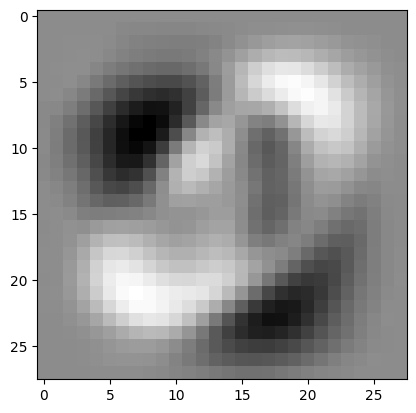

In [252]:
i = 1
train_scaler.inverse_transform(eigen_numbers)
plt.imshow(eigen_numbers[i].reshape((28, 28)), cmap='gray_r')

# print(y_train[i])
#Actually displaying the plot if you are not in interactive mode
plt.show()

In [224]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np

9


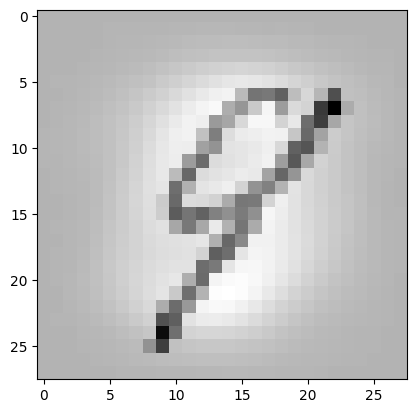

In [253]:

# first_array=np.reshape(x_train[0], (28,28))
#Not sure you even have to do that if you just want to visualize it
# first_array=255*first_array
# first_array=first_array.astype("uint8")
# plt.imshow(first_array)
i = 92
plt.imshow(x_test[i].reshape((28, 28)), cmap='gray_r')
print(y_test[i])
#Actually displaying the plot if you are not in interactive mode
plt.show()
#Saving plot
# plt.savefig("fig.png")

In [254]:
pca_train.shape

(60000, 331)

In [260]:
pca2 = PCA(n_components=331)
pca_test = pca.fit_transform(x_test)

In [256]:
pca_test.shape
# pca_train.shape

(10000, 331)

In [270]:
inversed_train = train_scaler.inverse_transform(x_train)
inversed_test = pca.inverse_transform(pca_test)
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(inversed_train, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(inversed_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=46.22%
k=5, accuracy=46.90%
k=10, accuracy=47.66%
k=20, accuracy=47.78%
k=30, accuracy=47.67%
